In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Importing of dataset

In [75]:
control = pd.read_csv('control_group.csv', sep = ';')
test = pd.read_csv('test_group.csv', sep = ';')
control.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,01.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,02.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,03.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,04.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,05.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [77]:
control.dropna(inplace=True)
control.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        29 non-null     object 
 1   Date                 29 non-null     object 
 2   Spend [USD]          29 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [78]:
test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,01.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,02.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,03.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,04.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,05.08.2019,2297,114295,95138,5863,2106,858,956,768


In [79]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


# A/B-testing

## Preparation for the test

In this step, we define a function to calculate key performance metrics for both test and control groups. These metrics include:

1. Conversion Rate = Purchases / Website Clicks

  The Conversion Rate measures the percentage of website visitors who complete a desired action, typically making a purchase. It is calculated by dividing the number of purchases by the number of website clicks.

2. CTR (Click-Through Rate) = Website Clicks / Impressions

  The Click-Through Rate measures the percentage of people who click on an ad or a link compared to the total number of impressions (views of the ad or link). It is calculated by dividing the number of website clicks by the number of impressions.

3. CPA (Cost per Acquisition) = Spend / Purchases

  The Cost per Acquisition measures how much it costs to acquire one customer through a specific marketing campaign. It is calculated by dividing the total spend on the campaign by the number of purchases made.

4. Add to Cart Rate = Add to Cart / View Content

  The Add to Cart Rate measures the percentage of visitors who add items to their shopping cart compared to those who view the product pages. It is calculated by dividing the number of "Add to Cart" actions by the number of "View Content" (product page views).

We apply this function to both datasets and preview the results.

In [80]:
def calculate_metrics(df):
    metrics = pd.DataFrame()
    metrics['conversion_rate'] = df['# of Purchase'] / df['# of Website Clicks']
    metrics['ctr'] = df['# of Website Clicks'] / df['# of Impressions']
    metrics['cpa'] = df['Spend [USD]'] / df['# of Purchase']
    metrics['add_to_cart_rate'] = df['# of Add to Cart'] / df['# of View Content']
    return metrics

test_metrics = calculate_metrics(test)
control_metrics = calculate_metrics(control)
test_metrics.head()

,conversion_rate,ctr,cpa,add_to_cart_rate
0,0.083937,0.076814,11.796078,0.836296
1,0.145373,0.046238,3.754801,0.567829
2,0.073304,0.112221,4.091696,0.535699
3,0.080645,0.053741,7.970588,0.393876
4,0.130991,0.051297,2.990885,1.114219


In [81]:
control_metrics.head()

,conversion_rate,ctr,cpa,add_to_cart_rate
0,0.088084,0.084835,3.689320,0.842520
1,0.063009,0.067003,3.438356,0.662140
2,0.057160,0.049411,6.298387,0.732085
3,0.110930,0.042057,5.705882,1.204684
5,0.189672,0.036928,4.035340,0.627702


## Main Hypothesis

H₀ (Null Hypothesis):
There is no difference in the conversion rate (Purchases / Website Clicks) between the test group and the control group.

H₁ (Alternative Hypothesis):
The test group has a higher conversion rate (Purchases / Website Clicks) than the control group.

In this block, we will perform the Shapiro-Wilk test for normality to check if the data from the test group and control group follow a normal distribution.

In [82]:
print("Test group normality: ", stats.shapiro(test_metrics['conversion_rate']))
print("Control group normality: ", stats.shapiro(control_metrics['conversion_rate']))

Test group normality:  ShapiroResult(statistic=np.float64(0.9254688343258307), pvalue=np.float64(0.03726829960369907))
Control group normality:  ShapiroResult(statistic=np.float64(0.8946046791264097), pvalue=np.float64(0.007293667050522254))


After performing the Shapiro-Wilk test, it's important to visually inspect the data to understand its distribution. In this block, we will generate QQ plots for both the test group and the control group for the conversion_rate. QQ plots show if the data points lie close to the reference line. If the data points deviate significantly from the line, it suggests that the data is not normally distributed.

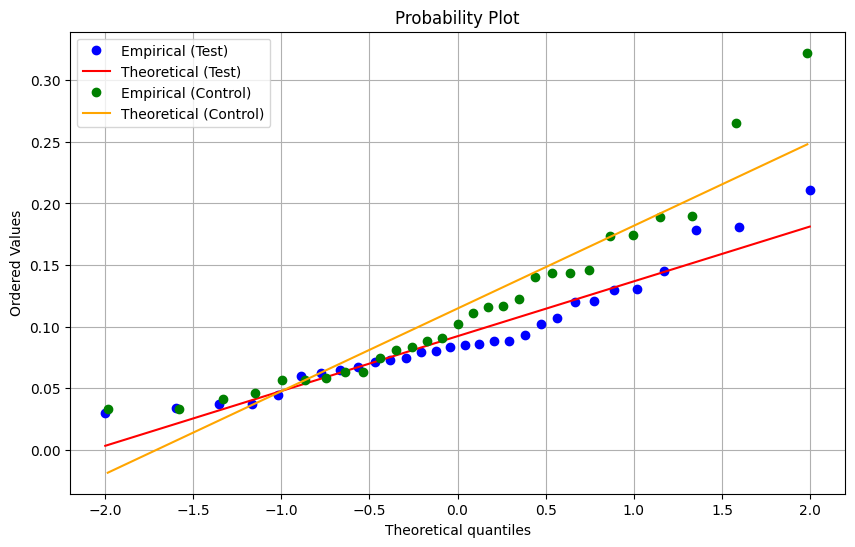

In [83]:
plt.figure(figsize=(10, 6))
stats.probplot(test_metrics['conversion_rate'], dist="norm", plot=plt)
plt.gca().get_lines()[0].set_color('blue')
plt.gca().get_lines()[1].set_color('red')
stats.probplot(control_metrics['conversion_rate'], dist="norm", plot=plt)
plt.gca().get_lines()[2].set_color('green')
plt.gca().get_lines()[3].set_color('orange')
plt.legend(['Empirical (Test)', 'Theoretical (Test)', 'Empirical (Control)', 'Theoretical (Control)'])
plt.grid();

Since we already performed normality tests and found that the data does not follow a normal distribution, we will use the Mann-Whitney U test. This non-parametric test does not assume normality and is used to assess whether there is a statistically significant difference between two independent groups.

In [84]:
test_stat, p_value = stats.mannwhitneyu(test_metrics['conversion_rate'], control_metrics['conversion_rate'])
print("Mann-Whitney U Test p-value:", round(p_value, 2))

Mann-Whitney U Test p-value: 0.31


For the conversion rate, the null hypothesis (H₀) stated that there is no difference between the test and control groups, while the alternative hypothesis (H₁) proposed that the test group would have a higher conversion rate. After conducting the test, we failed to reject the null hypothesis, with a p-value of 0.31. This result indicates that there is no statistically significant difference in conversion rates between the test and control groups. Therefore, the test group did not outperform the control group in terms of converting website visitors into purchases.

## Additional Hypotheses

### Click-Through Rate (CTR)

H₀: There is no difference in CTR (Website Clicks / Impressions) between the test and control groups.

H₁: The test group has a higher CTR than the control group.

Before selecting an appropriate test for comparing CTR between groups, we check whether the data is normally distributed using the Shapiro-Wilk test.
A p-value less than 0.05 suggests a significant deviation from normality.

In [85]:
print("Test group normality: ", stats.shapiro(test_metrics['ctr']))
print("Control group normality: ", stats.shapiro(control_metrics['ctr']))

Test group normality:  ShapiroResult(statistic=np.float64(0.8409182166025053), pvalue=np.float64(0.000402531289346151))
Control group normality:  ShapiroResult(statistic=np.float64(0.9549021042482709), pvalue=np.float64(0.24480975923502396))


We create Q-Q plots to visually assess how well the CTR distributions in both groups follow a normal distribution.
Deviations from the diagonal line indicate non-normality.

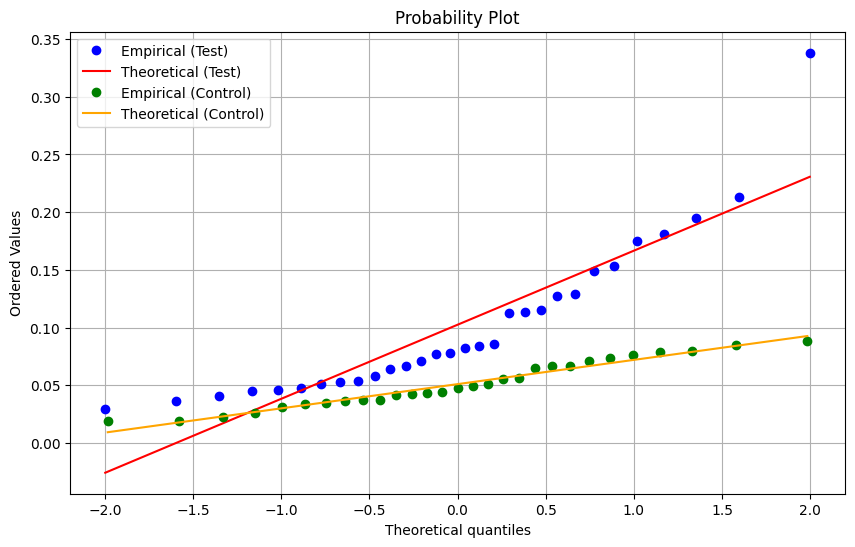

In [86]:
plt.figure(figsize=(10, 6))
stats.probplot(test_metrics['ctr'], dist="norm", plot=plt)
plt.gca().get_lines()[0].set_color('blue')
plt.gca().get_lines()[1].set_color('red')
stats.probplot(control_metrics['ctr'], dist="norm", plot=plt)
plt.gca().get_lines()[2].set_color('green')
plt.gca().get_lines()[3].set_color('orange')
plt.legend(['Empirical (Test)', 'Theoretical (Test)', 'Empirical (Control)', 'Theoretical (Control)'])
plt.grid();

Since normality may not hold, we use the Mann–Whitney U test (a non-parametric alternative to the t-test) to compare CTR between the groups.
This test does not assume normality and is based on ranks.

In [87]:
test_stat, p_value = stats.mannwhitneyu(test_metrics['ctr'], control_metrics['ctr'])
print("Mann-Whitney U Test p-value:", round(p_value, 4))

Mann-Whitney U Test p-value: 0.0003


To better understand the difference in CTR distributions between the test and control groups, we use a boxplot.
This visualization helps identify differences in central tendency and variability.

Text(0, 0.5, 'CTR')

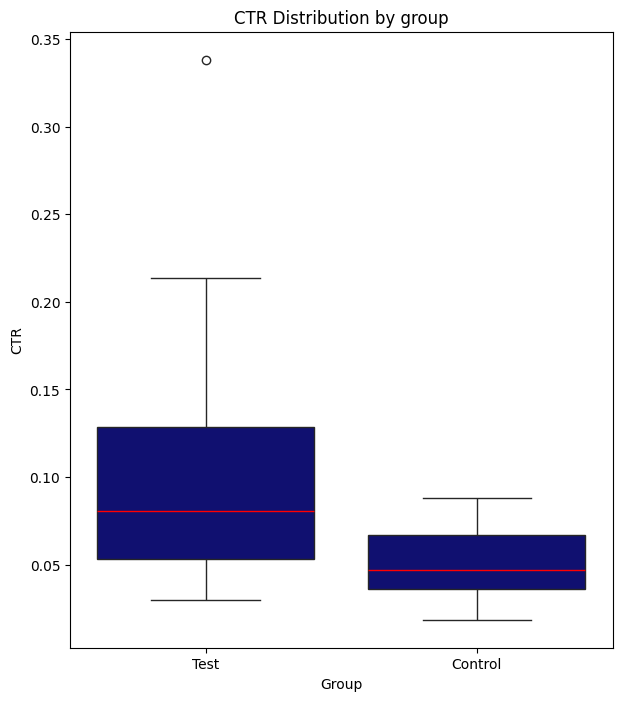

In [88]:
test_metrics['Group'] = 'Test'
control_metrics['Group'] = 'Control'
test_and_control_metrics = pd.concat([test_metrics, control_metrics], axis=0)

plt.figure(figsize=(7, 8))
sns.boxplot(x='Group', y='ctr', data=test_and_control_metrics, color='navy', medianprops=dict(color="red"))
plt.title('CTR Distribution by group')
plt.xlabel('Group')
plt.ylabel('CTR')

For the CTR, the null hypothesis (H₀) assumed no difference between the test and control groups, while the alternative hypothesis (H₁) suggested that the test group would have a higher CTR. The results showed a p-value of 0.0003, which is well below the commonly accepted significance level of 0.05. Thus, we rejected the null hypothesis. This indicates that the test group has a statistically significant higher CTR than the control group, meaning that users in the test group were more likely to click on the website’s content after viewing an impression.

### Cost per Acquisition (CPA)

H₀: There is no difference in CPA (Spend / Purchases) between the groups.

H₁: The test group has a lower CPA than the control group.

We begin by checking whether the CPA (Cost per Acquisition) values are normally distributed for both the test and control groups using the Shapiro-Wilk test.
If the p-value is below 0.05, we reject the assumption of normality.

In [89]:
print("Test group normality: ", stats.shapiro(test_metrics['cpa']))
print("Control group normality: ", stats.shapiro(control_metrics['cpa']))

Test group normality:  ShapiroResult(statistic=np.float64(0.8965798196078477), pvalue=np.float64(0.006934224858783165))
Control group normality:  ShapiroResult(statistic=np.float64(0.9131872183920033), pvalue=np.float64(0.02056352984195968))


To visually assess the normality of the CPA data, we use Q-Q plots for both groups.
Deviations from the reference line suggest non-normal distribution and help justify the use of non-parametric tests.

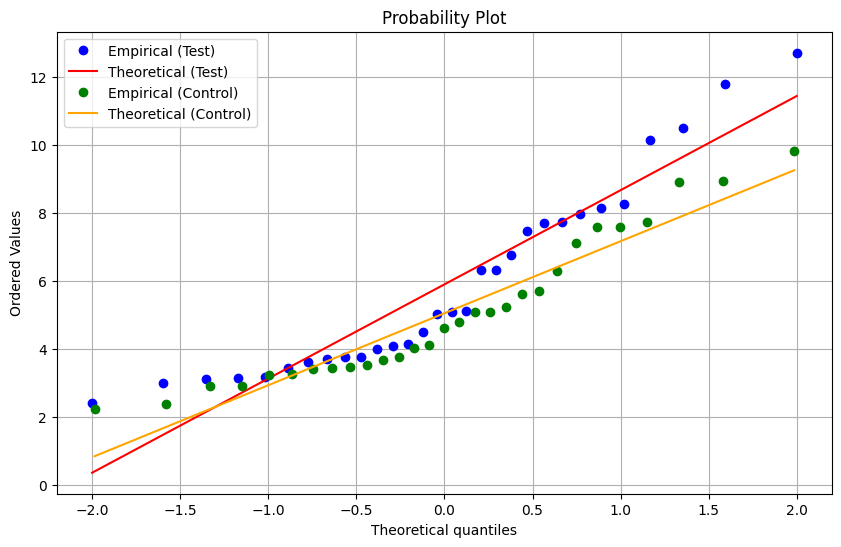

In [90]:
plt.figure(figsize=(10, 6))
stats.probplot(test_metrics['cpa'], dist="norm", plot=plt)
plt.gca().get_lines()[0].set_color('blue')
plt.gca().get_lines()[1].set_color('red')
stats.probplot(control_metrics['cpa'], dist="norm", plot=plt)
plt.gca().get_lines()[2].set_color('green')
plt.gca().get_lines()[3].set_color('orange')
plt.legend(['Empirical (Test)', 'Theoretical (Test)', 'Empirical (Control)', 'Theoretical (Control)'])
plt.grid();

Since normality may not hold, we apply the Mann–Whitney U test to compare CPA between the two groups.
We use the one-sided alternative hypothesis: the test group has a lower CPA than the control group.

In [91]:
u_stat, p_value = stats.mannwhitneyu(test_metrics['cpa'], control_metrics['cpa'], alternative='less')
print("Mann-Whitney U Test p-value:", round(p_value, 2))

Mann-Whitney U Test p-value: 0.87


For CPA, the null hypothesis (H₀) proposed no difference between the two groups, while the alternative hypothesis (H₁) suggested that the test group would have a lower CPA. The result of the Mann-Whitney U test gave a p-value of 0.87, which is much higher than 0.05. As a result, we failed to reject the null hypothesis. This suggests that there is no significant difference in CPA between the test and control groups. In other words, the test group did not achieve a lower cost per acquisition compared to the control group.

### Add to Cart Rate

H₀: No difference in Add to Cart rate (Add to Cart / View Content) between groups.

H₁: There is a difference in Add to Cart rate (Add to Cart / View Content) between groups.

Now we test whether the add-to-cart rate is normally distributed within each group using the Shapiro-Wilk test.
This helps us determine the appropriate statistical test for comparison.

In [92]:
print("Test group normality: ", stats.shapiro(test_metrics['add_to_cart_rate']))
print("Control group normality: ", stats.shapiro(control_metrics['add_to_cart_rate']))

Test group normality:  ShapiroResult(statistic=np.float64(0.9729065705249339), pvalue=np.float64(0.6213652151075515))
Control group normality:  ShapiroResult(statistic=np.float64(0.910932512670654), pvalue=np.float64(0.018078724784018688))


We generate Q-Q plots to inspect the add-to-cart rate distributions visually.
This complements the Shapiro test and allows us to better understand the shape of the data.

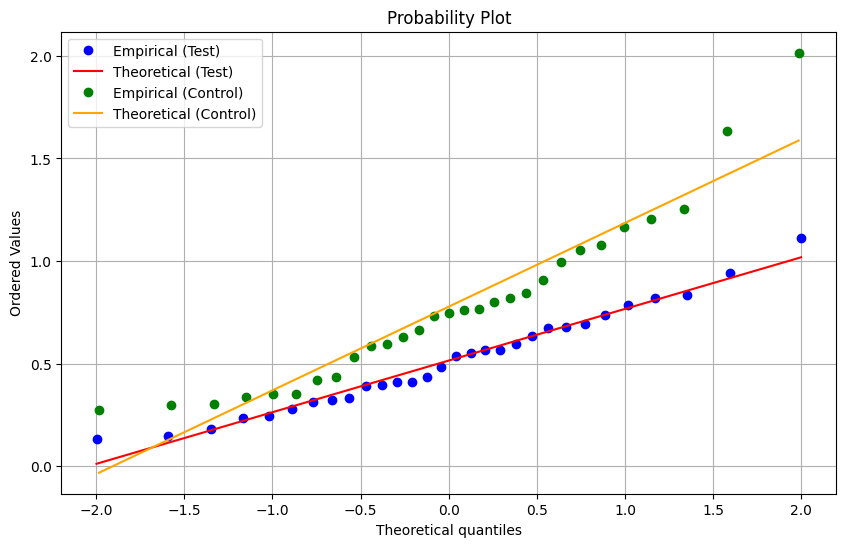

In [93]:
plt.figure(figsize=(10, 6))
stats.probplot(test_metrics['add_to_cart_rate'], dist="norm", plot=plt)
plt.gca().get_lines()[0].set_color('blue')
plt.gca().get_lines()[1].set_color('red')
stats.probplot(control_metrics['add_to_cart_rate'], dist="norm", plot=plt)
plt.gca().get_lines()[2].set_color('green')
plt.gca().get_lines()[3].set_color('orange')
plt.legend(['Empirical (Test)', 'Theoretical (Test)', 'Empirical (Control)', 'Theoretical (Control)'])
plt.grid();

In this case, the Shapiro-Wilk test indicates that the data is not normally distributed, as the p-value is less than 0.05. However, the QQ plot shows only slight deviations from normality at the ends of the distribution (heavy tails), which means the data is approximately normal with minor deviations.

If the add-to-cart rate appears approximately normal, we can proceed with an independent samples t-test.
This test checks for a statistically significant difference in means between the test and control groups.

In [94]:
t_stat, p_value = stats.ttest_ind(
    test_metrics['add_to_cart_rate'],
    control_metrics['add_to_cart_rate'],

)

alpha = 0.05

if p_value < alpha:
    print(f"Reject H₀: The groups have a significant difference, p-value is {round(p_value, 4)}.")
else:
    print(f"Fail to reject H₀: No significant difference found, p-value is {round(p_value, 2)}.")

Reject H₀: The groups have a significant difference, p-value is 0.0041.


To illustrate the distribution of the add-to-cart rate in each group, we use a boxplot.
This allows us to visually compare medians, spread, and potential outliers across groups.

Text(0, 0.5, 'add_to_cart_rate')

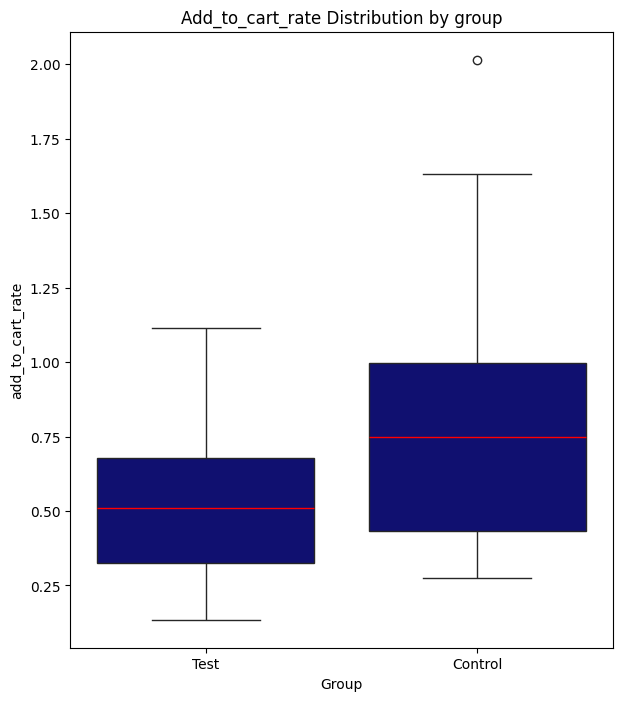

In [95]:
plt.figure(figsize=(7, 8))
sns.boxplot(x='Group', y='add_to_cart_rate', data=test_and_control_metrics, color='navy', medianprops=dict(color="red"))
plt.title('Add_to_cart_rate Distribution by group')
plt.xlabel('Group')
plt.ylabel('add_to_cart_rate')

For the Add to Cart rate, the null hypothesis (H₀) assumed no difference between the test and control groups, while the alternative hypothesis (H₁) suggested a difference between the two groups. The results revealed a p-value of 0.0041, which is below the 0.05 threshold for statistical significance. Therefore, we rejected the null hypothesis. This suggests that there is a statistically significant difference in the Add to Cart rate between the test and control groups, indicating that the test group was more likely to add items to the cart compared to the control group.

# Overall Summary

In conclusion, of the four metrics tested, two (CTR and Add to Cart rate) showed statistically significant differences, with the test group outperforming the control group in both areas. However, for the conversion rate and CPA, we found no significant improvements, suggesting that although the test group displayed higher engagement (increased CTR and Add to Cart rate), this did not translate into higher conversion rates or lower acquisition costs.

Given these results, further analysis or additional testing may be required before making any decisions, especially if the main goal is to improve conversions or reduce CPA. The current test suggests that while user engagement has improved, more changes or optimizations may be necessary to see measurable impact on sales performance.